# *Traffic Sign Recognizer - 98% accuracy*

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
from sklearn.metrics import classification_report

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Assigning Path for Dataset

In [ ]:
data_dir = '/content/drive/MyDrive/workshop/s1/Dataset'
train_path = '/content/drive/MyDrive/workshop/s1/Dataset/Train'
test_path = '/content/drive/MyDrive/workshop/s1/Dataset/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## Finding Total Classes

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
zipped_lists = zip(train_number, class_num)


In [ ]:
print(tuple(zipped_lists))

((210, 'Speed limit (20km/h)'), (2220, 'Speed limit (30km/h)'), (2010, 'No passing veh over 3.5 tons'), (1320, 'Right-of-way at intersection'), (2086, 'Priority road'), (2160, 'Yield'), (768, 'Stop'), (630, 'No vehicles'), (420, 'Veh > 3.5 tons prohibited'), (1110, 'No entry'), (1200, 'General caution'), (210, 'Dangerous curve left'), (2250, 'Speed limit (50km/h)'), (360, 'Dangerous curve right'), (330, 'Double curve'), (390, 'Bumpy road'), (510, 'Slippery road'), (270, 'Road narrows on the right'), (1500, 'Road work'), (600, 'Traffic signals'), (240, 'Pedestrians'), (540, 'Children crossing'), (270, 'Bicycles crossing'), (1410, 'Speed limit (60km/h)'), (450, 'Beware of ice/snow'), (780, 'Wild animals crossing'), (240, 'End speed + passing limits'), (689, 'Turn right ahead'), (420, 'Turn left ahead'), (1200, 'Ahead only'), (390, 'Go straight or right'), (210, 'Go straight or left'), (2058, 'Keep right'), (300, 'Keep left'), (1980, 'Speed limit (70km/h)'), (360, 'Roundabout mandatory'),

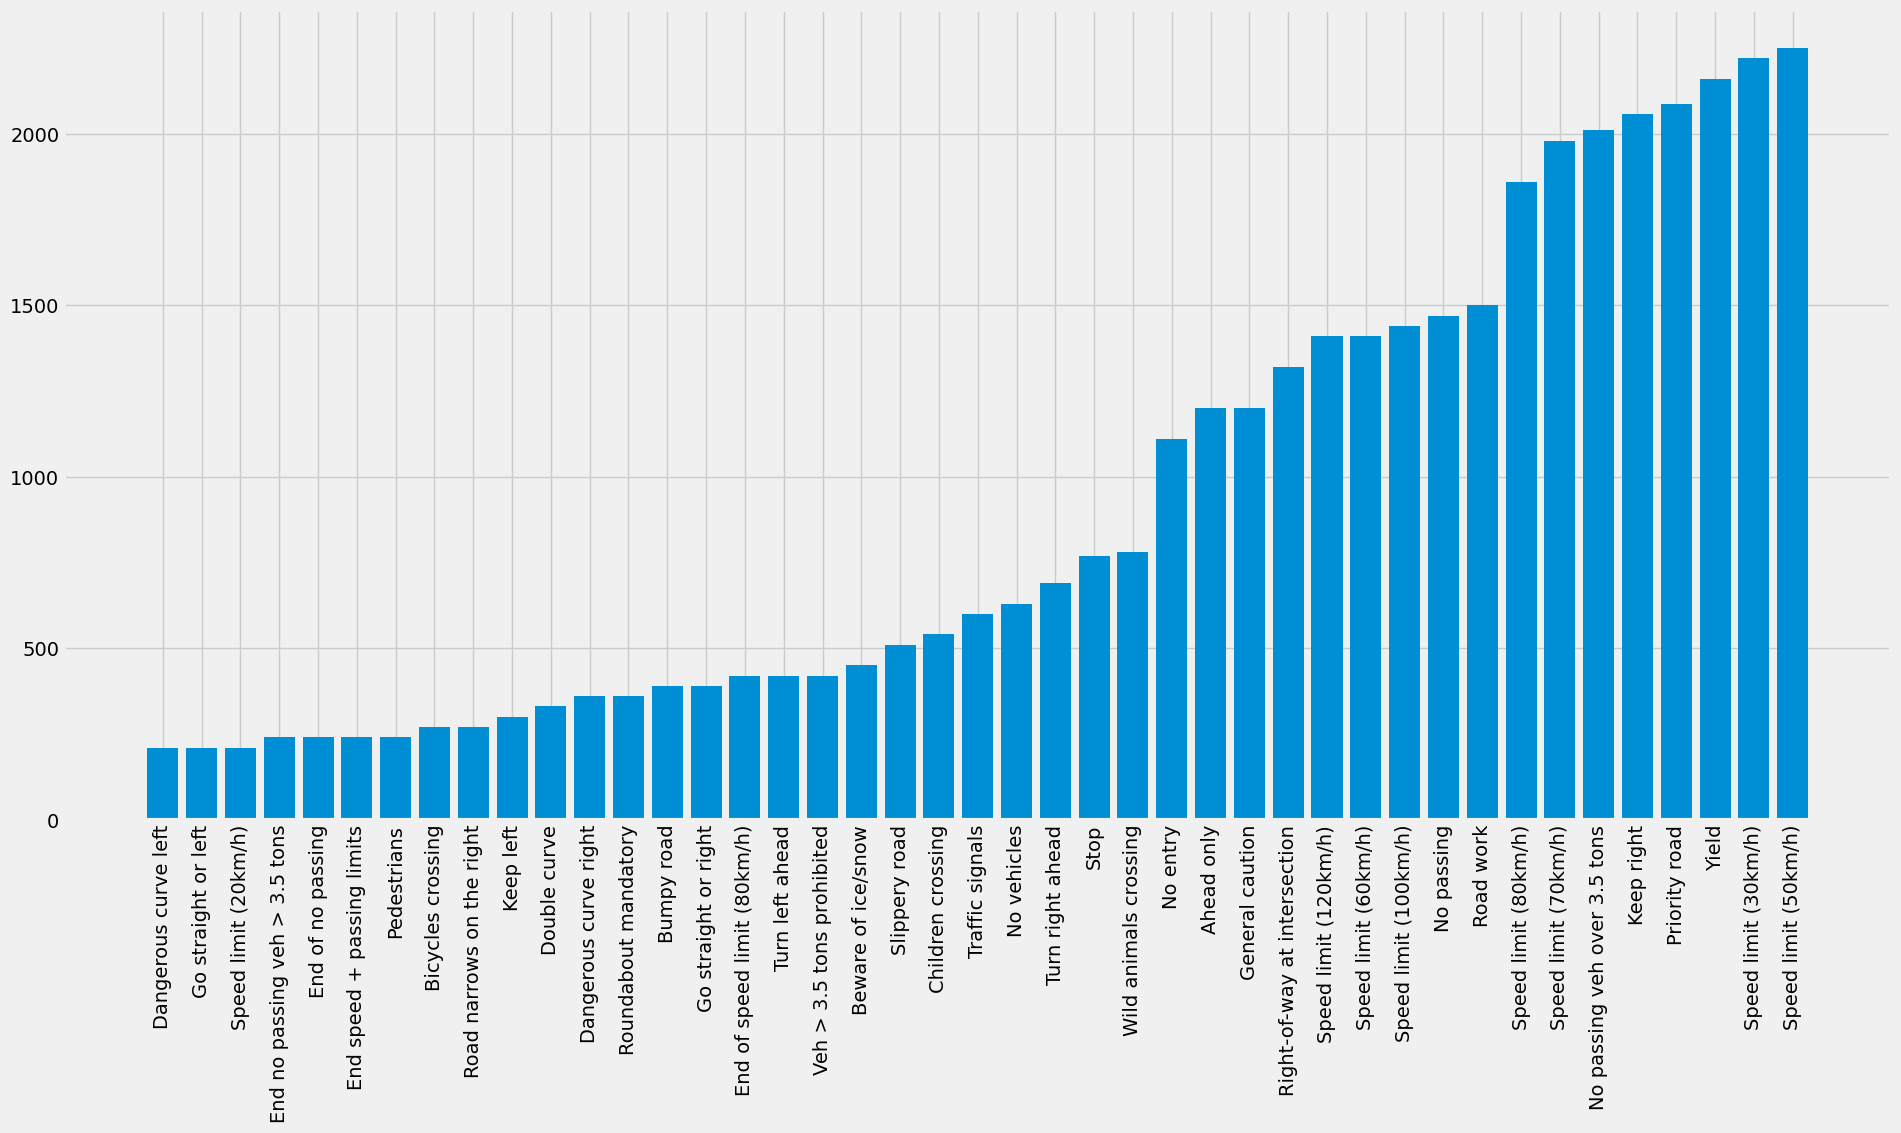

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

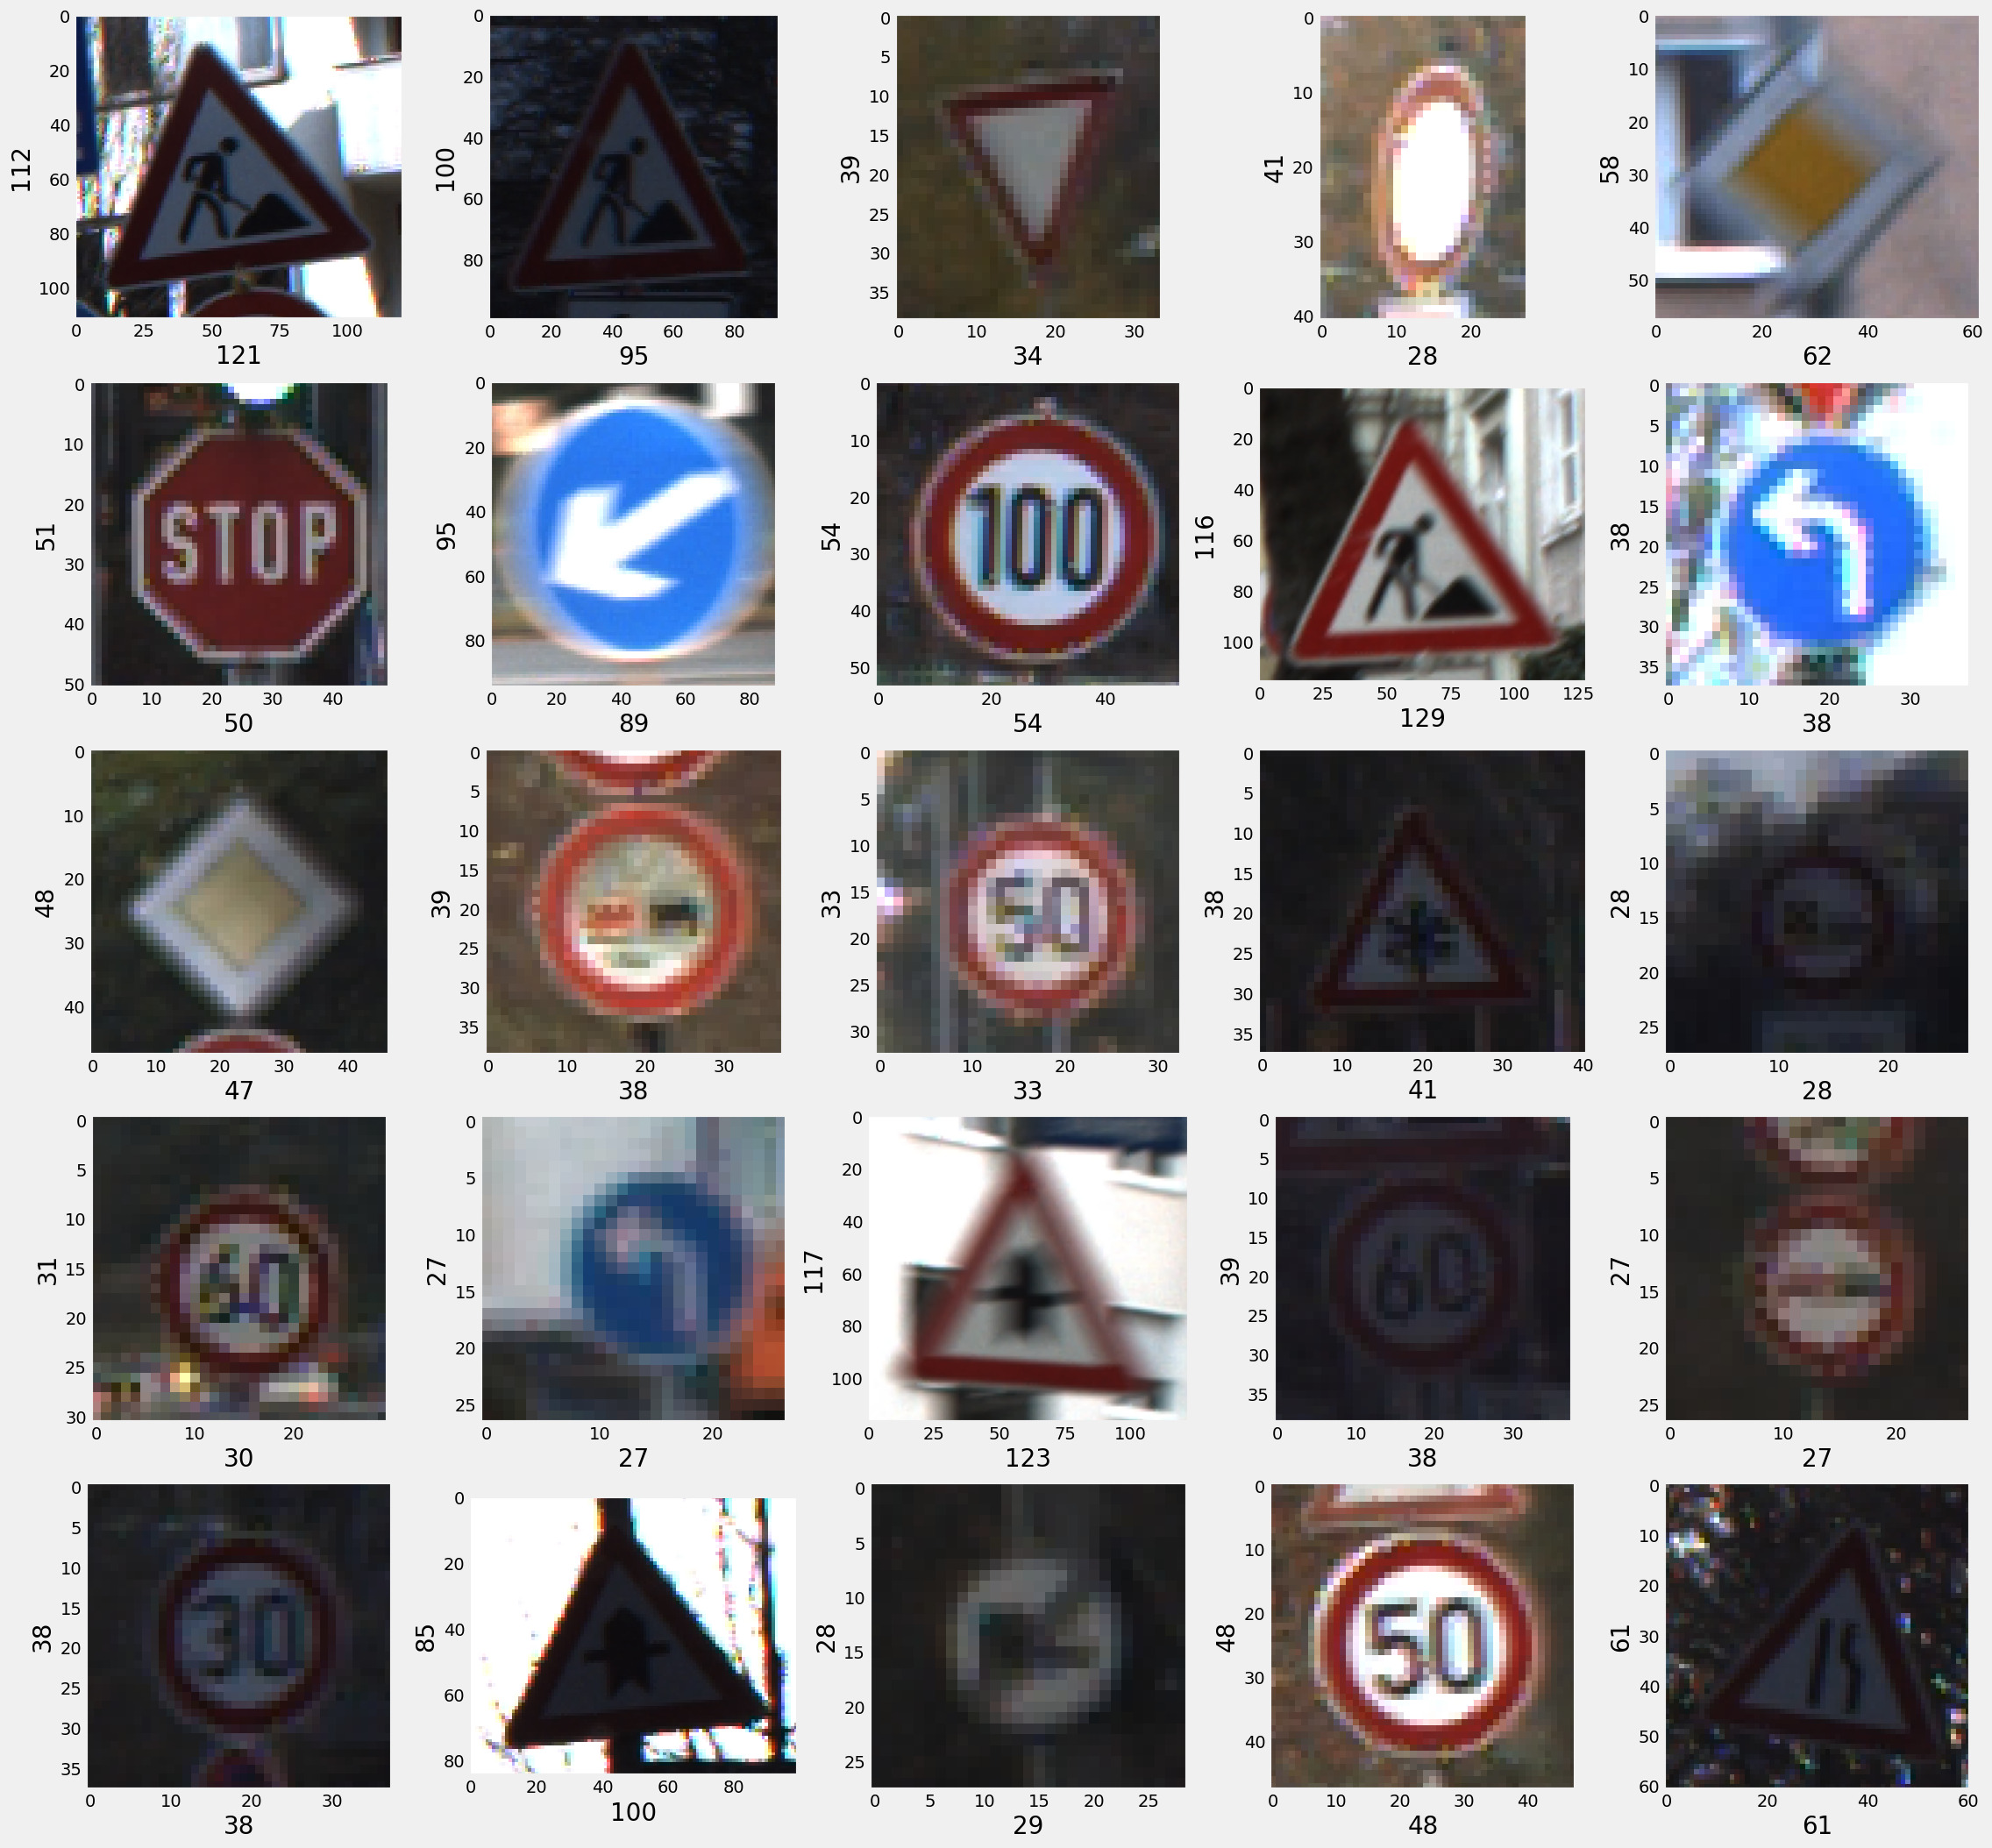

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Collecting the Training Data

In [ ]:
image_data = []
image_labels = []

from tqdm import tqdm

for i in tqdm(range(NUM_CATEGORIES)):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

100%|██████████| 43/43 [11:59<00:00, 16.73s/it]

(39171, 30, 30, 3) (39171,)


## Shuffling the training data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27419, 30, 30, 3)
X_valid.shape (11752, 30, 30, 3)
y_train.shape (27419,)
y_valid.shape (11752,)


## One hot encoding the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27419, 43)
(11752, 43)


## Making the model

In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    #keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    #keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 20

#opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
opt = keras.optimizers.legacy.Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Augmenting the data and training the model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))
model.save('/content/drive/MyDrive/workshop/s1/model.h5')


Epoch 1/20
857/857 [==============================] - 143s 165ms/step - loss: 1.4737 - accuracy: 0.5719 - val_loss: 0.2776 - val_accuracy: 0.9146
Epoch 2/20
857/857 [==============================] - 126s 147ms/step - loss: 0.3793 - accuracy: 0.8810 - val_loss: 0.0384 - val_accuracy: 0.9895
Epoch 3/20
857/857 [==============================] - 126s 146ms/step - loss: 0.2179 - accuracy: 0.9315 - val_loss: 0.0269 - val_accuracy: 0.9923
Epoch 4/20
857/857 [==============================] - 121s 141ms/step - loss: 0.1647 - accuracy: 0.9495 - val_loss: 0.0152 - val_accuracy: 0.9950
Epoch 5/20
857/857 [==============================] - 125s 146ms/step - loss: 0.1280 - accuracy: 0.9597 - val_loss: 0.0219 - val_accuracy: 0.9929
Epoch 6/20
857/857 [==============================] - 123s 143ms/step - loss: 0.1070 - accuracy: 0.9658 - val_loss: 0.0109 - val_accuracy: 0.9972
Epoch 7/20
857/857 [==============================] - 123s 143ms/step - loss: 0.0904 - accuracy: 0.9722 - val_loss: 0.0130 -

In [ ]:
# Check its architecture
#history.summary()

## Evaluating the model

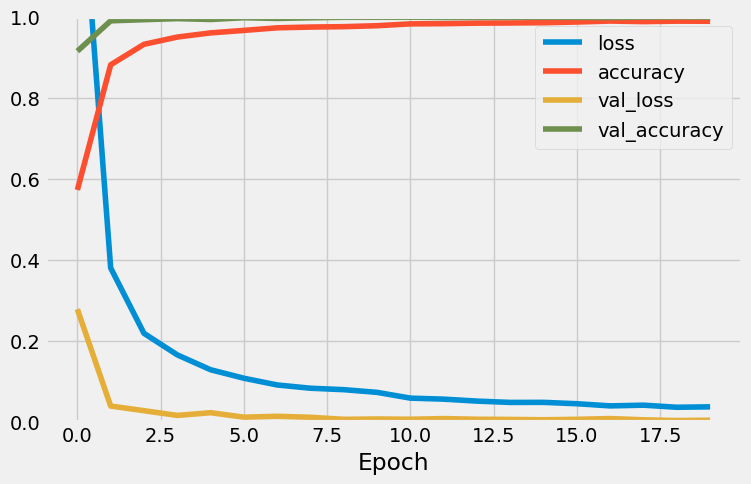

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

## Loading the test data and running the predictions

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in tqdm(imgs):
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)

#Accuracy with the test data
#print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

100%|██████████| 12630/12630 [00:49<00:00, 253.95it/s]


395/395 [==============================] - 13s 32ms/step


In [ ]:
pred = pred.argmax(axis=1)


In [ ]:

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.54315122723673


In [ ]:
print('labels: ',labels.shape)
print('pred: ',pred.shape)

labels:  (12630,)
pred:  (12630,)


## Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

<Axes: >

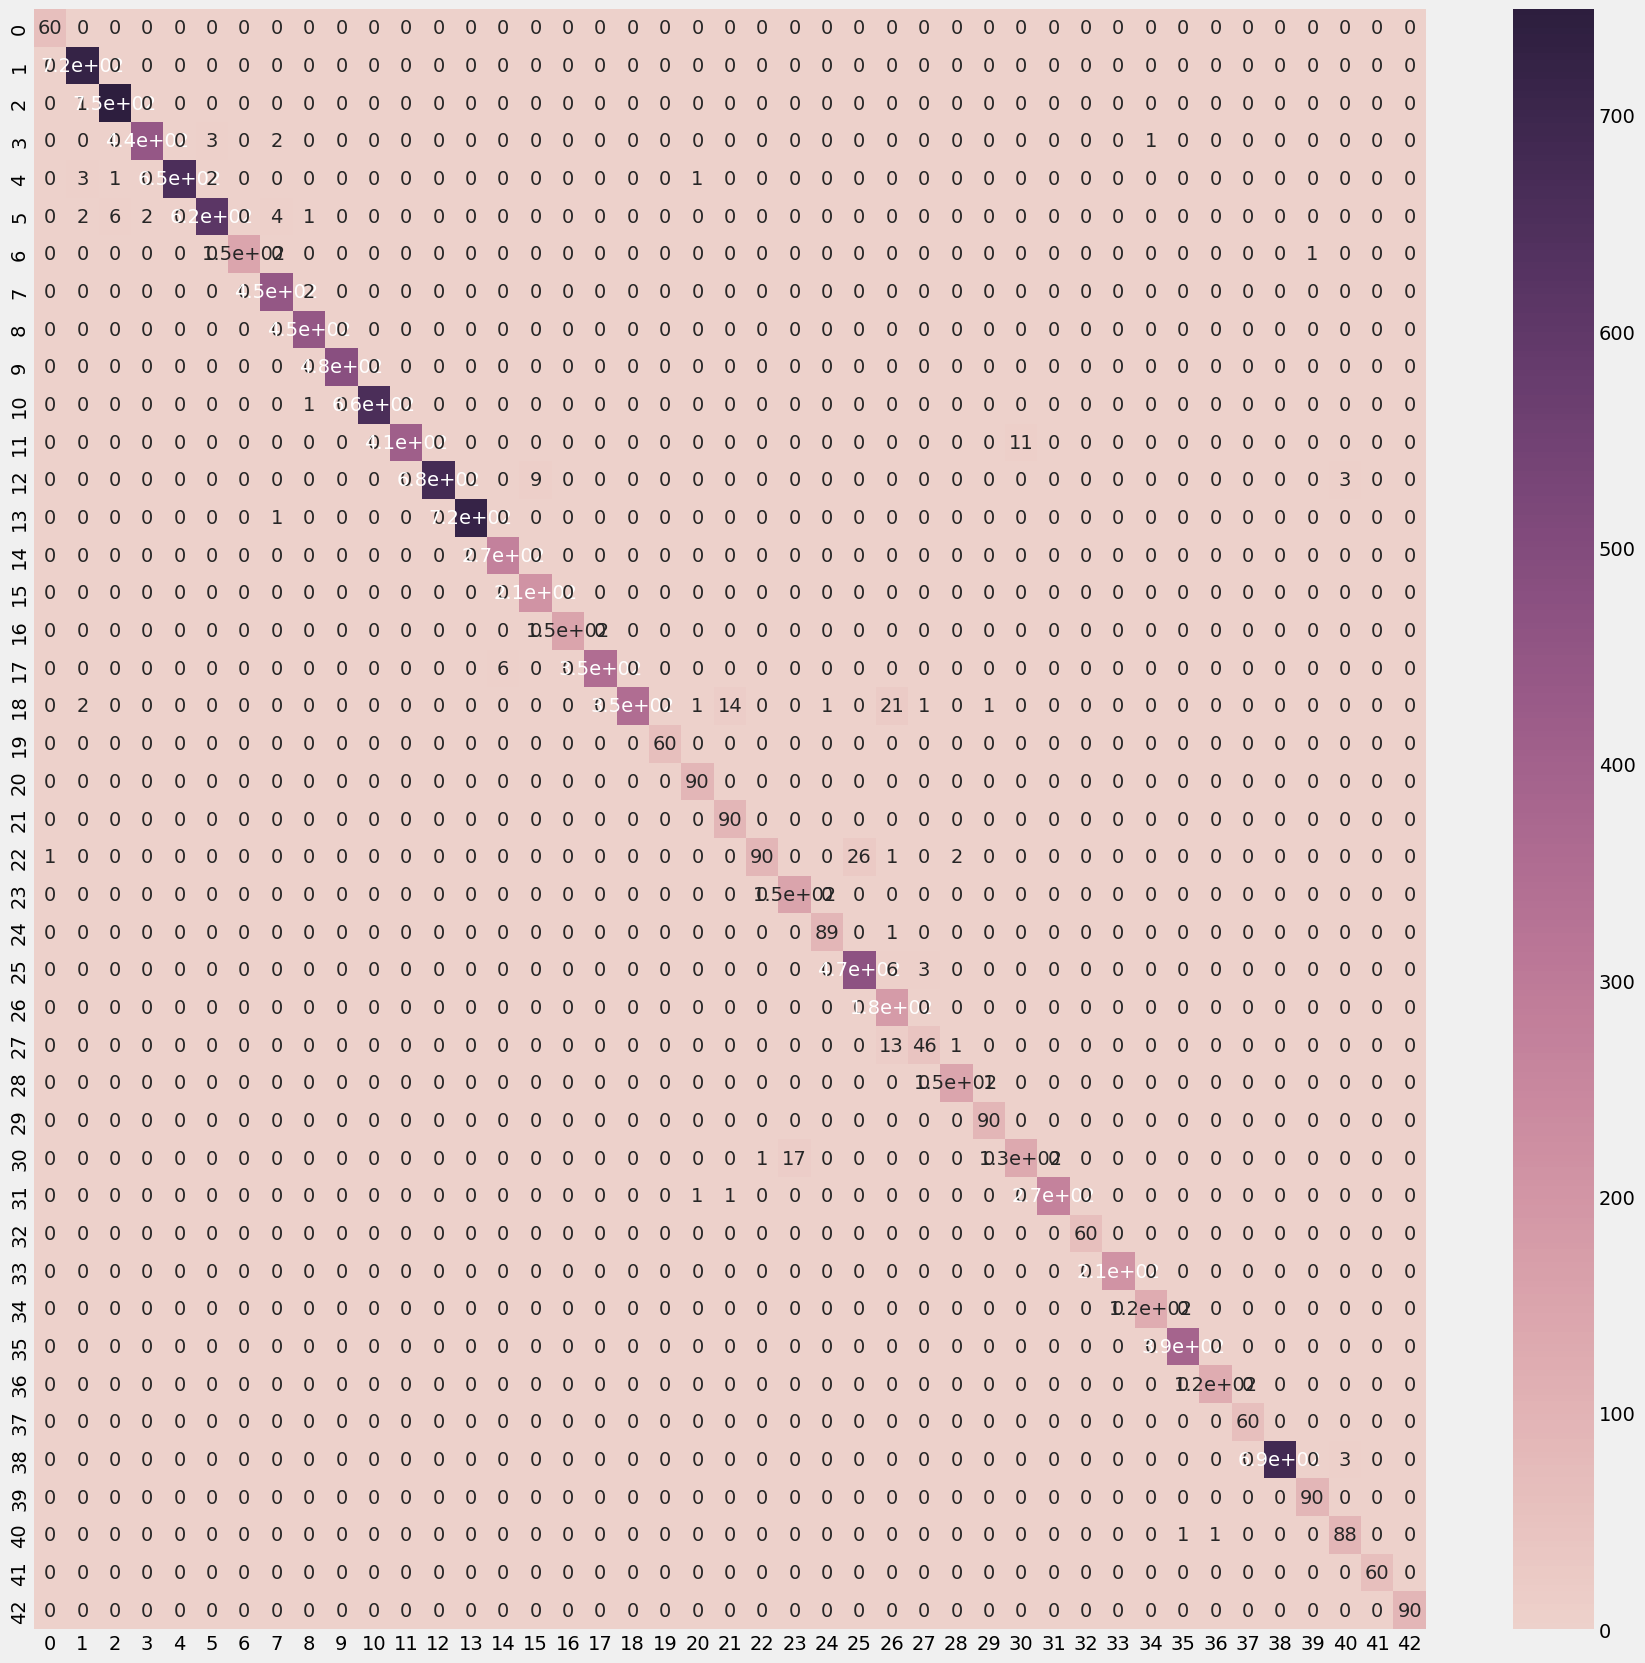

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

## Classification report

In [ ]:

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      0.99       720
           2       0.99      1.00      0.99       750
           3       1.00      0.99      0.99       450
           4       1.00      0.99      0.99       660
           5       0.99      0.98      0.98       630
           6       1.00      0.99      1.00       150
           7       0.98      1.00      0.99       450
           8       0.99      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      0.97      0.99       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       0.98      1.00      0.99       270
          15       0.96      1.00      0.98       210
          16       1.00      1.00      1.00       150
          17       1.00    

## Predictions on Test Data

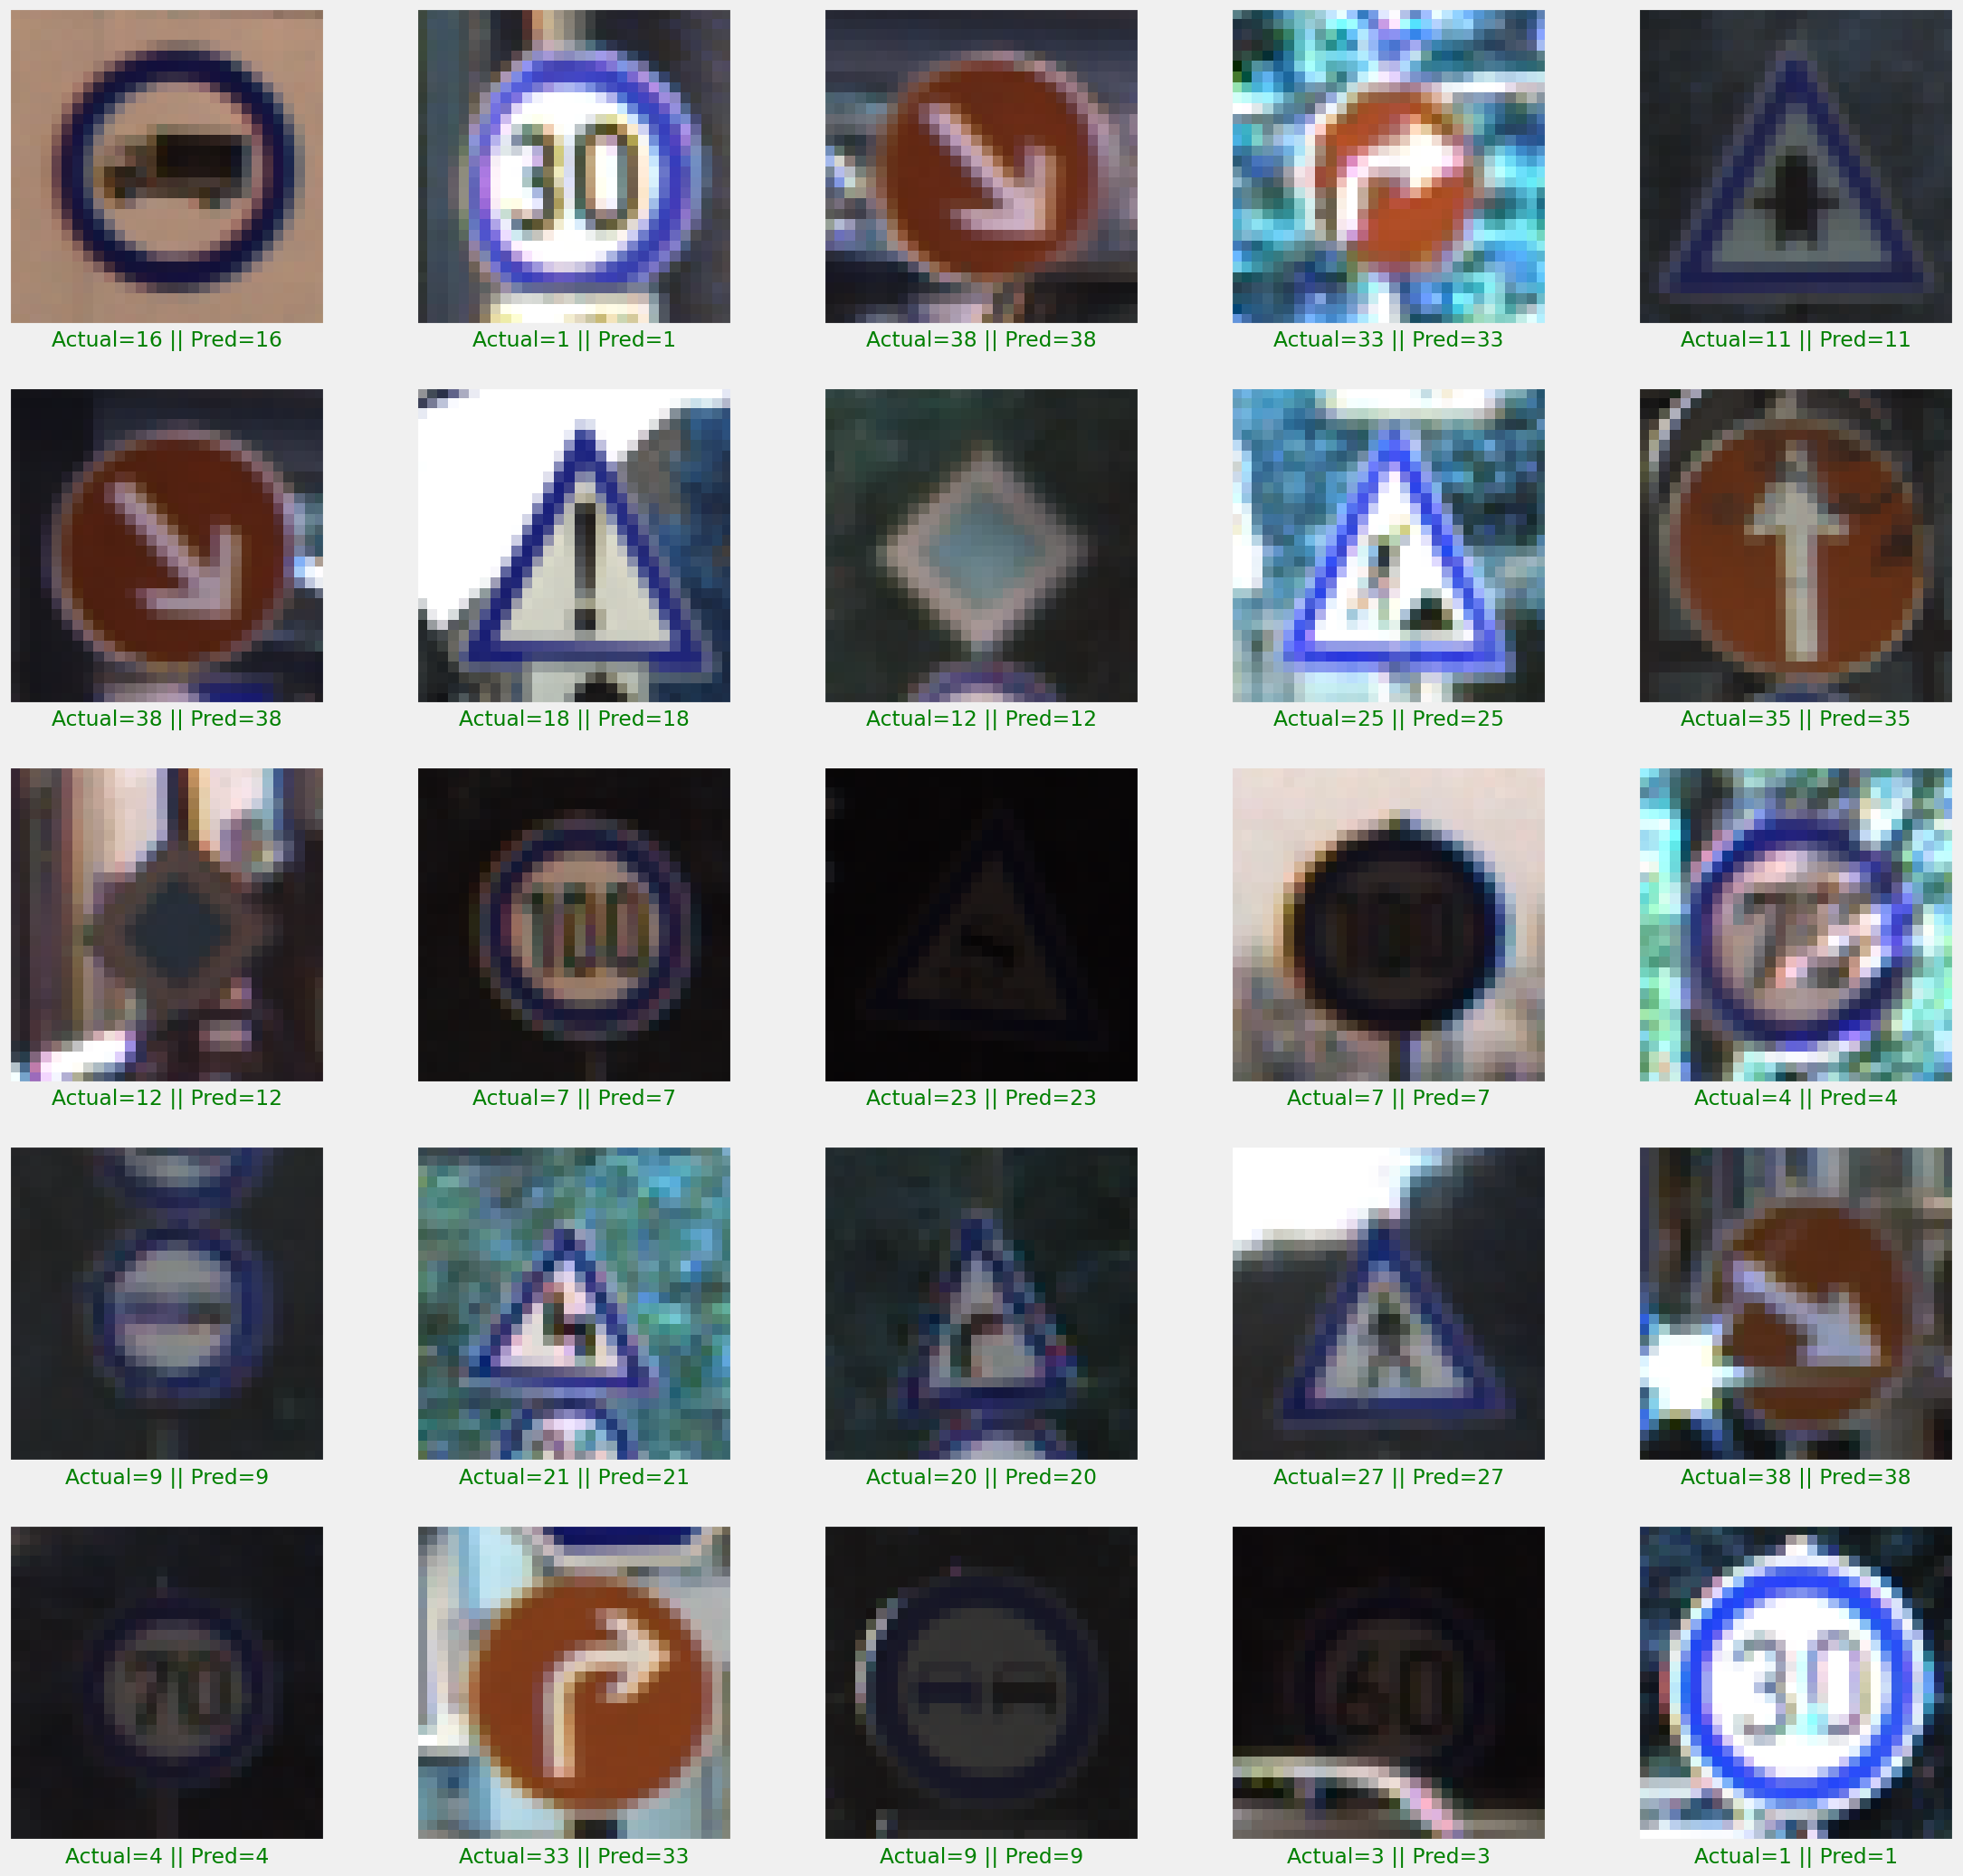

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()